<a href="https://colab.research.google.com/github/Ana-Paula-Ferrari/data_science/blob/main/estatistica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amostragem Simples**

seleção de elementos aleatórios, com a mesma chance de ser selecionados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
base = pd.read_csv("iris.csv")
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
base.shape

(150, 5)

In [ ]:
np.random.seed(2345) #semente - para manter os resultados em várias execuções
amostra = np.random.choice(a=[0, 1], size= 150, replace= True, p=[0.7, 0.3]) #criar amostra com reposição

#verificar o tamanho da amostra
print(len(amostra))
print(len(amostra[amostra == 0]))
print(len(amostra[amostra == 1]))


150
101
49


In [ ]:
amostra

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

**Amostragem Estratificada**

Selecionados pelas suas especificações


In [ ]:
  from sklearn.model_selection import train_test_split

In [ ]:
base['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [ ]:
#selecionamos 50% da base de dados
#retorna a amostra baseada na coluna "Class"
x, _, y, _ = train_test_split(base.iloc[:,0:4], base.iloc[:,4], test_size=0.5, stratify=base.iloc[:,4])

y.value_counts()

Iris-versicolor    25
Iris-virginica     25
Iris-setosa        25
Name: class, dtype: int64

In [ ]:
infert = pd.read_csv('infert.csv')
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [ ]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [ ]:
#gerando amostra com 40% dos registros
x1, _, y, _ = train_test_split(infert.iloc[:,2:9], infert.iloc[:,1], test_size=0.6, stratify= infert.iloc[:,1])
y.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

**Amostragem Sistemática**

A partir de um elemento aleatório, a cada N elemento um novo valor é escolhido

In [ ]:
from math import ceil

In [ ]:
#Definir intervalo entre os números
populacao = 150
amostra = 15
k = ceil (populacao/amostra)
print(k)

10


In [ ]:
#definição do valor randômico para inicializar a amostra, iniciando em 1 até k+1
r = np.random.randint(low= 1 , high= k + 1, size = 1)
print(r)

[1]


In [ ]:
#somar os próximos valores, baseado no primeiro valor r que foi definido acima
acumulador = r[0]
sorteados = []
for i in range(amostra):
  sorteados.append(acumulador)
  acumulador += k
print(sorteados)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141]


In [ ]:
len(sorteados)

15

In [ ]:
base_final = base.loc[sorteados]
base_final

,sepal length,sepal width,petal length,petal width,class
1,4.9,3.0,1.4,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor


**Medidas de Centralidade e Variabilidade**

In [ ]:
from scipy import stats

In [ ]:
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000 ]
print("Essa é a média dos salários dos jogadores: ",np.mean(jogadores))
print("Essa é a mediana dos salários dos jogadores: ",np.median(jogadores))

Essa é a média dos salários dos jogadores:  181111.11111111112
Essa é a mediana dos salários dos jogadores:  40000.0


In [ ]:
#quartis (0%, 25%, 50%, 75% e 100%)
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [ ]:
#desvio padrão
np.std(jogadores, ddof=1)

255307.87514511007

In [ ]:
#visualização das estatísticas
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

**Distribuição Normal**

Mostra como os dados estão distribuidos.

Formato sinuoso ao centro mostra dados normamelmente distribuídos.


In [ ]:
from scipy.stats import norm

In [ ]:
#objetos em uma cesta, média = 8 desvio padrão =2
print("Probabilidade de tirar um objeto de peso < que 6 quilos: ", norm.cdf(6,8,2))
print("Probabilidade de tirar um objeto de peso > que 6 quilos: ", norm.sf(6,8,2)) #ou 1 - norm.cdf(6,8,2))
print("Probabilidade de tirar um objeto de peso < que 6 quilos e > que 8 quilos: ",norm.cdf(6, 8, 2 ) + norm.sf(10, 8, 2))
print("Probabilidade de tirar um objeto de peso < que 10 quilos e > que 8 quilos",norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2))


Probabilidade de tirar um objeto de peso < que 6 quilos:  0.15865525393145707
Probabilidade de tirar um objeto de peso > que 6 quilos:  0.8413447460685429
Probabilidade de tirar um objeto de peso < que 6 quilos e > que 8 quilos:  0.31731050786291415
Probabilidade de tirar um objeto de peso < que 10 quilos e > que 8 quilos 0.3413447460685429


**Teste de Normalidade**

In [ ]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

Dados normalmente distribuídos

In [ ]:
#Criação de uma variável com dados em uma distribuição normal com a função rvs
dados = norm.rvs(size=1000)
dados

array([ 1.16104057e+00, -3.04241815e-01,  1.11030908e+00,  3.24091161e-02,
        8.77555921e-01, -6.16239833e-02, -2.01157655e+00, -8.75535009e-01,
        8.35514053e-02,  1.26005978e+00, -2.26152746e-01, -1.02911840e+00,
       -3.72327393e-01, -5.60467381e-01,  2.32572235e+00, -8.04471933e-01,
       -1.34357414e-01, -1.71897033e+00,  4.81848398e-01, -8.91057486e-01,
       -1.01319119e+00,  2.56431406e-01, -8.81210667e-01, -2.21920935e-01,
       -1.59736004e-01, -4.19358359e-01, -2.08478064e-01, -2.10625259e+00,
        9.68992167e-01,  8.86926545e-02, -7.66239488e-01, -6.35827955e-02,
       -1.30305710e+00, -1.25668839e+00,  9.72347633e-02, -2.81665862e-01,
       -6.93943961e-01, -1.44375995e+00, -6.79122800e-01, -2.85674763e-01,
        1.69663609e+00,  6.32965217e-01, -7.36562314e-01,  4.35528140e-01,
       -4.38592680e-01,  9.80998358e-01, -1.64984745e+00, -1.42513574e+00,
        1.43344691e-01, -1.22087628e+00, -4.93943112e-01,  1.00233637e+00,
        2.58936228e-01, -

Text(0.5, 1.0, 'Dados')

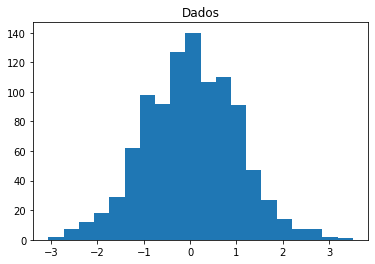

In [ ]:
#Verificação da distribuição
plt.hist(dados, bins=20)
plt.title('Dados')

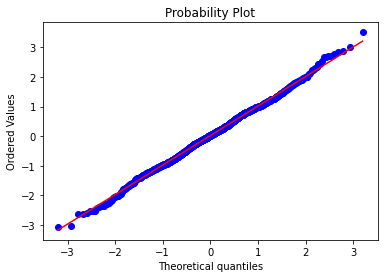

In [ ]:
#Verificação da distribuição
fig, ax = plt.subplots()
stats.probplot(dados, fit=True, plot=ax)
plt.show()

In [ ]:
#Teste de Shapiro 
#p < 0.05 dados não estão normalemente distribuídos
#p > 0.05 dados normalemente distribuídos
stats.shapiro(dados)

ShapiroResult(statistic=0.9982603788375854, pvalue=0.40919235348701477)

Dados que não estão normalmente distribuídos

In [ ]:
#Criação de uma variável com dados em uma distribuição anormal
dadosB= skewnorm.rvs(4, size=1000)
dadosB

array([ 1.01578146e+00,  3.59713529e-01,  4.02540639e-01,  2.61017121e-01,
        1.21093331e-02,  1.43235410e+00,  9.31787230e-01,  6.50701207e-01,
        3.21575701e-01, -1.15926352e-01,  9.64654578e-01,  1.96735171e-01,
        7.51627692e-02, -4.02487490e-02,  7.88514098e-01,  1.22581833e+00,
        1.69066332e+00,  8.24000559e-01,  2.97384662e-02,  1.14730363e+00,
        2.70094590e-01, -9.49970811e-02,  3.82120107e-01,  6.85538181e-01,
        1.14765286e+00,  6.08147055e-01,  1.95555153e+00,  1.81195795e+00,
        5.97069596e-01,  2.47838205e+00,  1.65874349e+00,  1.55819367e+00,
       -2.09390719e-01,  2.17639950e-01,  6.62088497e-01,  1.50823254e+00,
        4.32195573e-01,  7.76249748e-02,  9.02257857e-01,  6.89111426e-01,
        1.06831762e-01,  2.24332418e-01,  6.02658883e-01,  8.14621429e-01,
        5.46755381e-01, -8.45933497e-02, -1.78809319e-01,  1.32713810e+00,
        5.71813134e-01,  2.67077862e-01,  5.37103925e-01, -8.49917125e-02,
        1.12872041e+00,  

Text(0.5, 1.0, 'Dados')

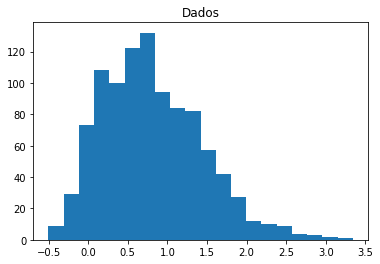

In [ ]:
plt.hist(dadosB, bins=20)
plt.title('Dados')

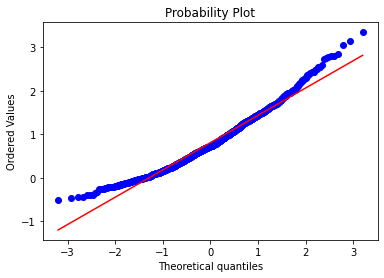

In [ ]:
fig, ax= plt.subplots()
stats.probplot(dadosB, fit=True, plot=ax)
plt.show()

In [ ]:
#Teste de Shapiro 
#p < 0.05 dados não estão normalemente distribuídos
#p > 0.05 dados normalemente distribuídos
stats.shapiro(dadosB)

ShapiroResult(statistic=0.9734974503517151, pvalue=1.5366184887011247e-12)